<a href="https://colab.research.google.com/github/spiyer99/fastbook_sols/blob/master/19_learner_sols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()

     |████████████████████████████████| 727kB 6.7MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 194kB 10.5MB/s 
     |████████████████████████████████| 1.2MB 10.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 12.8MB 21.8MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [5]:
from fastbook import *

## Questionnaire

__1. What is `glob`?__

A library to get files based on wildcard searches

__2. How do you open an image with the Python imaging library?__

In [84]:
path = untar_data(URLs.IMAGENETTE_160)

__3. What does `L.map` do?__

In [90]:
from glob import glob

def get_img_files(path):  
  print(f'{path}/*/*/*.*G')
  return L(glob(f'{path}/*/*/*.*G', recursive=True)).map(Path)

files = get_img_files(path)

/root/.fastai/data/imagenette2-160/*/*/*.*G


It applies the `Path` function to every cell of the list in L

__4. What does `Self` do?__

In [91]:
lbls = files.map(Self.parent.name()).unique(); lbls

(#10) ['n03888257','n03445777','n03425413','n03394916','n03417042','n03000684','n03028079','n02102040','n01440764','n02979186']

It allows you to access a particular cell of the list

__5. What is `L.val2idx`?__

In [92]:
v2i = lbls.val2idx(); v2i

{'n01440764': 8,
 'n02102040': 7,
 'n02979186': 9,
 'n03000684': 5,
 'n03028079': 6,
 'n03394916': 3,
 'n03417042': 4,
 'n03425413': 2,
 'n03445777': 1,
 'n03888257': 0}

Creates a unique list of label and index

__6. What methods do you need to implement to create your own `Dataset`?__

In [93]:
# bare minimum
class Dataset():
    def __len__(self): pass
    def __getitem__(self, i): pass

__7. Why do we call `convert` when we open an image from Imagenette?__

In [94]:
img_path = files[0]

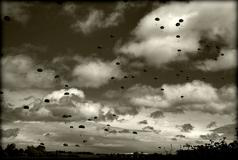

In [95]:
PIL.Image.open(img_path)

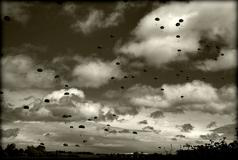

In [96]:
PIL.Image.open(img_path).convert('RGB')

It removes the alpha channel if it's present. It converts an image to a jpeg format.

__8. What does `~` do? How is it useful for splitting training and validation sets?__

`~` negates the True/False operators is in the list. 



In [97]:
train_filt = L(o.parent.parent.name=='train' for o in files)
train = files[train_filt] # returns all places where `train_filt` is `True` in the list `files`
valid = files[~train_filt] # returns all places where `train_filt` is not `True` in the list `files`

__9. Does `~` work with the `L` or `Tensor` classes? What about NumPy arrays, Python lists, or pandas DataFrames?__

Yes it does.

__10. What is `ProcessPoolExecutor`?__

It allows for multiprocessing.

__11. How does `L.range(self.ds)` work?__

In [109]:
class Dataset:
    def __init__(self, fns): self.fns=fns
    def __len__(self): return len(self.fns)
    def __getitem__(self, i):
        im = Image.open(self.fns[i]).resize((64,64)).convert('RGB')
        y = v2i[self.fns[i].parent.name]
        return tensor(im).float()/255, tensor(y)

train_ds = Dataset(train)
x, y = train_ds[0]
x.shape, y.shape

(torch.Size([64, 64, 3]), torch.Size([]))

In [103]:
L.range(train_ds)

(#9469) [0,1,2,3,4,5,6,7,8,9...]

In [113]:
[i for i in range(len(train_ds))][0:9]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

It returns a list of integers of length `ds`

__12. What is `__iter__`?__


In [117]:
def collate(idxs, ds): 
    xb,yb = zip(*[ds[i] for i in idxs])
    return torch.stack(xb),torch.stack(yb)

class DataLoader:
    def __init__(self, ds, bs=128, shuffle=False, n_workers=1):
        self.ds,self.bs,self.shuffle,self.n_workers = ds,bs,shuffle,n_workers

    def __len__(self): return (len(self.ds)-1)//self.bs+1

    def __iter__(self):
        idxs = L.range(self.ds)
        if self.shuffle: idxs = idxs.shuffle()
        chunks = [idxs[n:n+self.bs] for n in range(0, len(self.ds), self.bs)]
        with ProcessPoolExecutor(self.n_workers) as ex:
            yield from ex.map(collate, chunks, ds=self.ds)

train_dl = DataLoader(train_ds, bs=128, shuffle=True, n_workers=16)
xb,yb = first(train_dl)
xb.shape,yb.shape,len(train_dl)

(torch.Size([128, 64, 64, 3]), torch.Size([128]), 74)

It returns the iterator

__13. What is `first`?__

Gives you the first batch in the dl

__14. What is `permute`? Why is it needed?__

We use it to convert `NHWC` to `NCHW`. PIL uses the former but we need the latter for PyTorch.


__15. What is a recursive function? How does it help us define the `parameters` method?__

A function that calls itself.



__16. Write a recursive function that returns the first 20 items of the Fibonacci sequence.__

In [125]:
def _r_fibonacci(n):
  if n==0: return 0
  if n==1: return 1
  return fibonacci(n-1) + fibonacci(n-2)

def get_fibonacci(n):
  return [_r_fibonacci(i) for i in range(n)]

get_fibonacci(20)

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181]

__17. What is `super`?__

It's an object that allows you to access methods of the base class


https://www.programiz.com/python-programming/methods/built-in/super#:~:text=The%20super()%20builtin%20returns,Working%20with%20Multiple%20Inheritance

__18. Why do subclasses of `Module` need to override `forward` instead of defining `__call__`?__

`__call__` is already defined in `Module`. `__call__` *calls* the forward function and runs the hooks.

__19. In `ConvLayer`, why does `init` depend on `act`?__

`Kaiming init` deals with the dying ReLU problem quite well. If we don't have any `ReLU`'s then we should probably use a different kind of init


__20. Why does `Sequential` need to call `register_modules`?__

In order to show the contents of the layer in parameters


__21. Write a hook that prints the shape of every layer's activations.__



In [136]:
class Parameter(Tensor):
    def __new__(self, x): return Tensor._make_subclass(Parameter, x, True)
    def __init__(self, *args, **kwargs): self.requires_grad_()

class Module:
    def __init__(self):
        self.hook,self.params,self.children,self._training = None,[],[],False
        
    def register_parameters(self, *ps): self.params += ps
    def register_modules   (self, *ms): self.children += ms
        
    @property
    def training(self): return self._training
    @training.setter
    def training(self,v):
        self._training = v
        for m in self.children: m.training=v
            
    def parameters(self):
        return self.params + sum([m.parameters() for m in self.children], [])

    def __setattr__(self,k,v):
        super().__setattr__(k,v)
        if isinstance(v,Parameter): self.register_parameters(v)
        if isinstance(v,Module):    self.register_modules(v)
        
    def __call__(self, *args, **kwargs):
        res = self.forward(*args, **kwargs)
        if self.hook is not None: self.hook(res, args)
        return res
    
    def cuda(self):
        for p in self.parameters(): p.data = p.data.cuda()
''
class ConvLayer(Module):
    def __init__(self, ni, nf, stride=1, bias=True, act=True):
        super().__init__()
        self.w = Parameter(torch.zeros(nf,ni,3,3))
        self.b = Parameter(torch.zeros(nf)) if bias else None
        self.act,self.stride = act,stride
        init = nn.init.kaiming_normal_ if act else nn.init.xavier_normal_
        init(self.w)
    
    def forward(self, x):
        x = F.conv2d(x, self.w, self.b, stride=self.stride, padding=1)
        if self.act: x = F.relu(x)
        return x

class Sequential(Module):
    def __init__(self, *layers):
        super().__init__()
        self.layers = layers
        self.register_modules(*layers)

    def forward(self, x):
        for l in self.layers: x = l(x)
        return x

class AdaptivePool(Module):
    def forward(self, x): return x.mean((2,3))

class Linear(Module):
    def __init__(self, ni, nf):
        super().__init__()
        self.w = Parameter(torch.zeros(nf,ni))
        self.b = Parameter(torch.zeros(nf))
        nn.init.xavier_normal_(self.w)
    
    def forward(self, x): return x@self.w.t() + self.b

In [137]:
def simple_cnn():
    return Sequential(
        ConvLayer(3,16 ,stride=2), #32
        ConvLayer(16,32 ,stride=2), #16
        ConvLayer(32,64 ,stride=2), # 8
        ConvLayer(64,128,stride=2), # 4
        AdaptivePool(),
        Linear(128, 10)
    )

In [138]:
m = simple_cnn()
len(m.parameters())

10

In [142]:
class Normalize:
    def __init__(self, stats): self.stats=stats
    def __call__(self, x):
        if x.device != self.stats[0].device:
            self.stats = to_device(self.stats, x.device)
        return (x-self.stats[0])/self.stats[1]

stats = [xb.mean((0,1,2)),xb.std((0,1,2))]
norm = Normalize(stats)

def tfm_x(x): return norm(x).permute((0,3,1,2))

xbt = tfm_x(xb)

In [149]:
def print_stats(outp, inp): 
  print(outp.shape)

for i in range(4): 
  m.layers[i].hook = print_stats

r = m(xbt)
r.shape

torch.Size([128, 16, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 4, 4])


torch.Size([128, 10])

__22. What is "LogSumExp"?__

$$\log \left ( \sum_{j=1}^{n} e^{x_{j}} \right ) = \log \left ( e^{a} \sum_{j=1}^{n} e^{x_{j}-a} \right ) = a + \log \left ( \sum_{j=1}^{n} e^{x_{j}-a} \right )$$

where $a$ is the maximum of $x_{j}$.

__23. Why is `log_softmax` useful?__

Improved numerical performance. This can be useful as training can be computationally expensive.


https://datascience.stackexchange.com/questions/40714/what-is-the-advantage-of-using-log-softmax-instead-of-softmax

__24. What is `GetAttr`? How is it helpful for callbacks?__


__25. Reimplement one of the callbacks in this chapter without inheriting from `Callback` or `GetAttr`.__



1. What does `Learner.__call__` do?
1. What is `getattr`? (Note the case difference to `GetAttr`!)
1. Why is there a `try` block in `fit`?
1. Why do we check for `model.training` in `one_batch`?
1. What is `store_attr`?
1. What is the purpose of `TrackResults.before_epoch`?
1. What does `model.cuda` do? How does it work?
1. Why do we need to check `model.training` in `LRFinder` and `OneCycle`?
1. Use cosine annealing in `OneCycle`.